In [1]:
# This is a hidden cell which will be executed but will not show up in Sphinx docs.
# To hide a cell, in Jupyter go to Menu->View->Cell Toolbar->Edit Metadata
# and enter in {"nbsphinx": "hidden"}

# Set figure size and font size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['font.size'] = 12

# Configure quickplot to hide subports
import functools
from phidl import quickplot as qp, set_quickplot_options
import phidl
set_quickplot_options(show_subports = False)

# Geometry library

Reference for the built-in geometry library in [PHIDL](https://github.com/amccaugh/phidl).  Most of the functions here are found in PHIDL's `phidl.geometry` library, which is typically imported as `pg`.  For instance, below you will see the `phidl.geometry.arc()` function called as `pg.arc()`

## Basic shapes

### Rectangle

To create a simple rectangle, there are two functions:

``pg.rectangle()`` can create a basic rectangle:

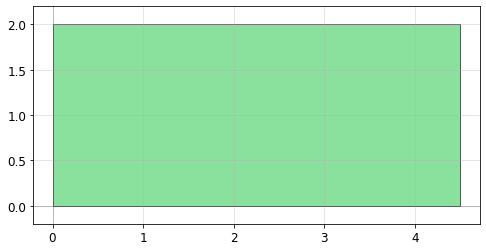

In [2]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.rectangle(size = (4.5, 2), layer = 0)
qp(D) # quickplot the geometry

``pg.bbox()`` can also create a rectangle based on a bounding box.  This is useful if you want to create a rectangle which exactly surrounds a piece of existing geometry.  For example, if we have an arc geometry and we want to define a box around it, we can use ``pg.bbox()``: 

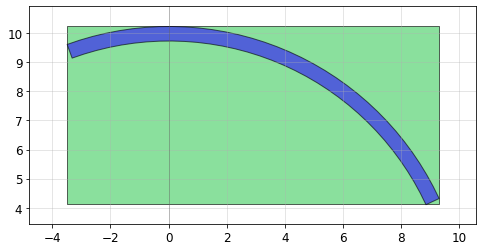

In [3]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
arc = D << pg.arc(radius = 10, width = 0.5, theta = 85, layer = 1).rotate(25)
# Draw a rectangle around the arc we created by using the arc's bounding box
rect = D << pg.bbox(bbox = arc.bbox, layer = 0)
qp(D) # quickplot the geometry

### Cross

The ``pg.cross()`` function creates a cross structure:

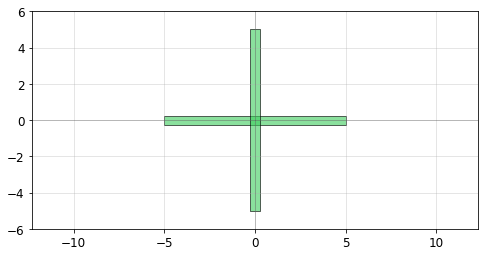

In [4]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.cross(length = 10, width = 0.5, layer = 0)
qp(D) # quickplot the geometry

### Ellipse

The ``pg.ellipse()`` function creates an ellipse by defining the major and minor radii:

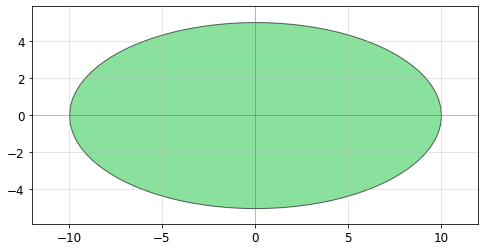

In [5]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.ellipse(radii = (10,5), angle_resolution = 2.5, layer = 0)
qp(D)

### Circle

The ``pg.circle()`` function creates a circle:

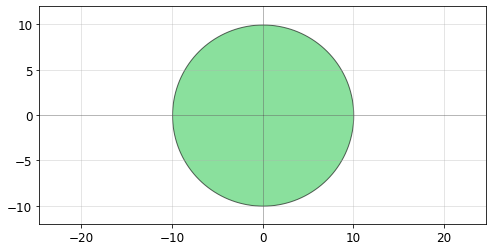

In [6]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.circle(radius = 10, angle_resolution = 2.5, layer = 0)
qp(D) # quickplot the geometry

### Ring


The ``pg.ring()`` function creates a ring.  The radius refers to the center radius of the ring structure (halfway between the inner and outer radius).

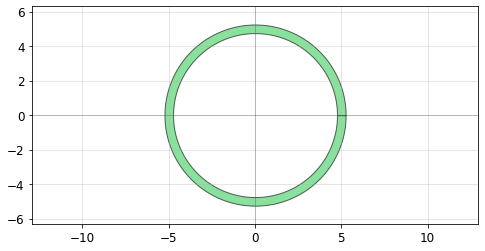

In [7]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.ring(radius = 5, width = 0.5, angle_resolution = 2.5, layer = 0)
qp(D) # quickplot the geometry

### Arc

The ``pg.arc()`` function creates an arc.  The radius refers to the center radius of the arc (halfway between the inner and outer radius).  The arc has two ports, ``1`` and ``2``, on either end, allowing you to easily connect it to other structures.

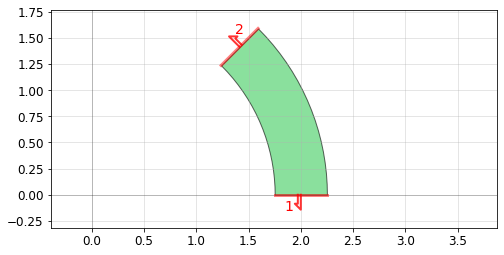

In [8]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.arc(radius = 2.0, width = 0.5, theta = 45, start_angle = 0,
           angle_resolution = 2.5, layer = 0)
qp(D) # quickplot the geometry

### Tapers


`pg.taper()`is defined by setting its length and its start and end length.  It has two ports, ``1`` and ``2``, on either end, allowing you to easily connect it to other structures.

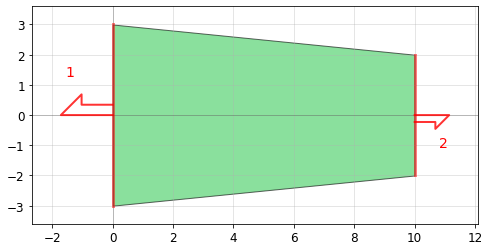

In [9]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.taper(length = 10, width1 = 6, width2 = 4, port = None, layer = 0)
qp(D) # quickplot the geometry

`pg.ramp()` is a structure is similar to `taper()` except it is asymmetric.  It also has two ports, ``1`` and ``2``, on either end.

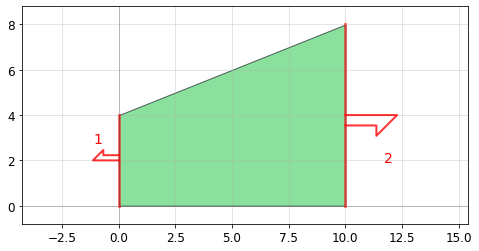

In [10]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.ramp(length = 10, width1 = 4, width2 = 8, layer = 0)
qp(D) # quickplot the geometry

### Common compound shapes

The `pg.L()` function creates a "L" shape with ports on either end named ``1`` and ``2``.

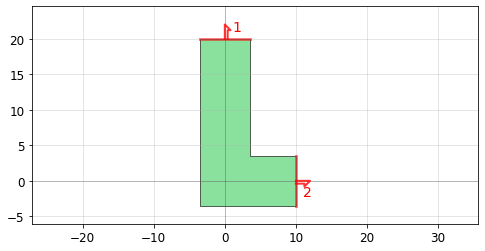

In [11]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.L(width = 7, size = (10,20) , layer = 0)
qp(D) # quickplot the geometry

The `pg.C()` function creates a "C" shape with ports on either end named ``1`` and ``2``.

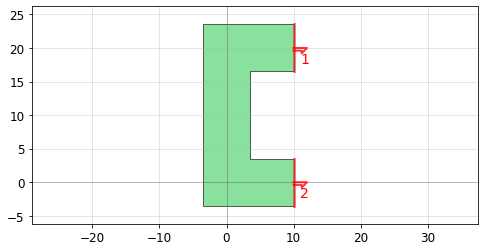

In [12]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.C(width = 7, size = (10,20) , layer = 0)
qp(D) # quickplot the geometry

## Text
PHIDL has an implementation of the DEPLOF font with the majority of english ASCII characters represented.

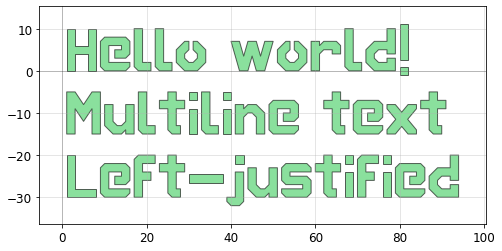

In [13]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.text(text = 'Hello world!\nMultiline text\nLeft-justified', size = 10,
            justify = 'left', layer = 0)
# `justify` should be either 'left', 'center', or 'right'
qp(D) # quickplot the geometry

Furthermore, you can also use any true-type font or open-type font that is installed on your system (including unicode fonts). For portability, fonts can also be referenced by path.

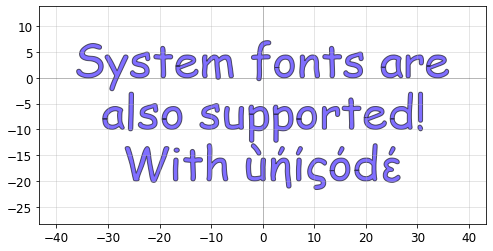

In [14]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.text(text = 'System fonts are\nalso supported!\nWith ùήίςόdέ', size = 10,
            justify = 'center', layer = 1, font="Comic Sans MS")
# Alternatively, fonts can be loaded by file name
qp(D) # quickplot the geometry

## Grid / gridsweep / packer / align / distribute

### Grid


The ``pg.grid()`` function can take a list (or 2D array) of objects and arrange them along a grid. This is often useful for making parameter sweeps.   If the `separation` argument is true, grid is arranged such that the elements are guaranteed not to touch, with a `spacing` distance between them.  If `separation` is false, elements are spaced evenly along a grid. The `align_x`/`align_y` arguments specify intra-row/intra-column alignment.  The`edge_x`/`edge_y` arguments specify inter-row/inter-column alignment (unused if `separation = True`).

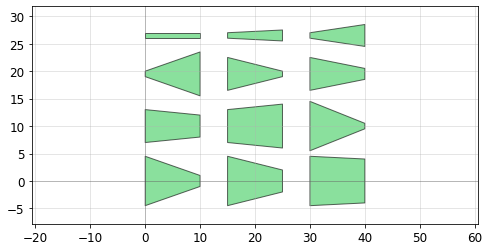

In [15]:
import phidl.geometry as pg
from phidl import quickplot as qp

device_list = []
for width1 in [1, 6, 9]:
    for width2 in [1, 2, 4, 8]:
        D = pg.taper(length = 10, width1 = width1, width2 = width2, layer = 0)
        device_list.append(D)

G = pg.grid(device_list,
            spacing = (5,1),
            separation = True,
            shape = (3,4),
            align_x = 'x',
            align_y = 'y',
            edge_x = 'x',
            edge_y = 'ymax')

qp(G)

### Gridsweep

The `pg.gridsweep()` function creates a parameter sweep of devices and places them on a grid, optionally labeling each device with its specific parameters. You can sweep multiple parameters simultaneously in the x and/or y direction, allowing you to make very complex parameter sweeps.  See the `grid` documentation above for further explanation about the `edge_x`/`edge_y`/`separation`/`spacing` arguments

In the simplest example, we can just sweep one parameter each in the x and y directions.  Here, let's sweep the `radius` argument of `pg.circle` in the x-direction, and the `layer` argument in the y-direction:


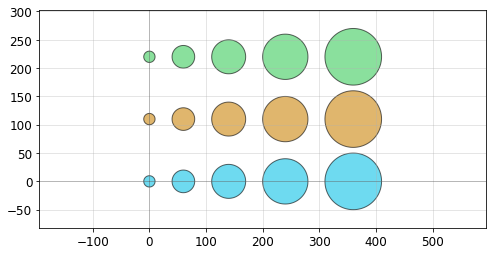

In [16]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.gridsweep(
    function = pg.circle,
    param_x = {'radius' : [10,20,30,40,50]},
    param_y = {'layer'  : [0,  5, 9]},
    param_defaults = {},
    param_override = {},
    spacing = (30,10),
    separation = True,
    align_x = 'x',
    align_y = 'y',
    edge_x = 'x',
    edge_y = 'ymax',
    label_layer = None)

qp(D)

In a more advanced sweep, we can vary multiple parameters.  Here we'll vary one parameter in the x-direction (the ellipse `width`), but **two** parameters in the y-direction (the ellipse `height` and the `layer`):

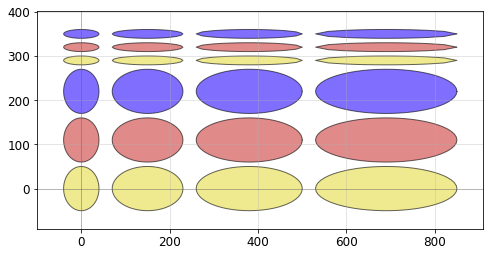

In [17]:
import phidl.geometry as pg
from phidl import quickplot as qp

def custom_ellipse(width, height, layer):
    D = pg.ellipse(radii = (width, height), layer = layer)
    return D

D = pg.gridsweep(
    function = custom_ellipse,
    param_x = {'width' :  [40, 80, 120, 160]},
    param_y = {'height' : [10, 50],
               'layer' :  [1, 2, 3]  },
    spacing = (30,10))

qp(D)

The `param_defaults` and `param_override` arguments are also useful when you want to make multiple sets of sweeps and but want to have a baseline/default set of parameters to use.  Here, we can make an array of  `litho_calipers()` to perform alignment between multiple layers, and use the `param_defaults`

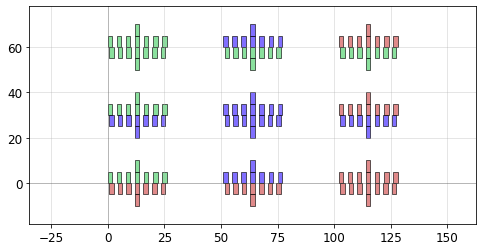

In [18]:
import phidl.geometry as pg
from phidl import quickplot as qp

param_defaults = dict( notch_size = [2, 5],
                       notch_spacing = 2,
                       num_notches = 3,
                       offset_per_notch = 0.2,
                       row_spacing = 0
                     )

D = pg.gridsweep(
    function = pg.litho_calipers,
    param_x = {'layer1' : [0,1,2]},
    param_y = {'layer2'  : [0,1,2]},
    param_defaults = param_defaults,
    param_override = {},
    spacing = (25,10))

qp(D)

Later, if we want to change some of the default parameters, we can use the same `param_defaults` dictionary but override one (or more) of the parameters.  Here, let's keep everything the same but override the `row_spacing` parameter to put a little vertical space between the layers:

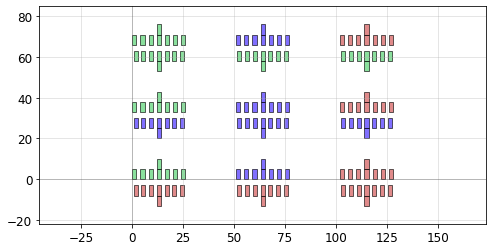

In [19]:
D = pg.gridsweep(
    function = pg.litho_calipers,
    param_x = {'layer1' : [0,1,2]},
    param_y = {'layer2'  : [0,1,2]},
    param_defaults = param_defaults,
    param_override = {'row_spacing' : 3}, # <--- overriding the "row_spacing" parameter
    spacing = (25, 10))

qp(D)

### Packer


The ``pg.packer()`` function is able to pack geometries together into rectangular bins. If a ``max_size`` is specified, the function will create as many bins as is necessary to pack all the geometries and then return a list of the filled-bin Devices.

Here we generate several random shapes then pack them together automatically. We allow the bin to be as large as needed to fit all the Devices by specifying ``max_size = (None, None)``.  By setting ``aspect_ratio = (2,1)``, we specify the rectangular bin it tries to pack them into should be twice as wide as it is tall:

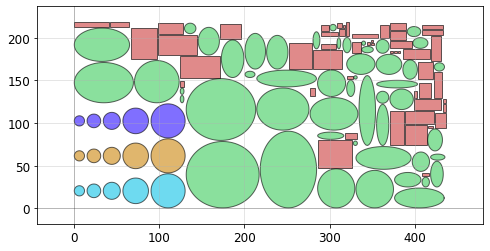

In [20]:
import phidl.geometry as pg
from phidl import quickplot as qp
import numpy as np

# Create a lot of random objects
np.random.seed(3)
D_list = [pg.ellipse(radii = np.random.rand(2)*n+2, layer = 0) for n in range(50)]
D_list += [pg.rectangle(size = np.random.rand(2)*n+2, layer = 2) for n in range(50)]

# Also create a parameter sweep
D = pg.gridsweep(
    function = pg.circle,
    param_x = {'radius' : [6,8,10,15,20]},
    param_y = {'layer'  : [1, 5, 9]},
    spacing = (3,1))
D_list += [D]

# Pack everything together
D_packed_list = pg.packer(
        D_list,                 # Must be a list or tuple of Devices
        spacing = 1.25,         # Minimum distance between adjacent shapes
        aspect_ratio = (2,1),   # (width, height) ratio of the rectangular bin
        max_size = (None,None), # Limits the size into which the shapes will be packed
        density = 1.05,         # Values closer to 1 pack tighter but takes longer
        sort_by_area = True,    # Pre-sorts the shapes by area
        verbose = False,
        )
D = D_packed_list[0] # Only one bin was created, so we plot that
qp(D) # quickplot the geometry

Say we need to pack many shapes into multiple 500x500 unit die. If we set ``max_size = (500,500)`` the shapes will be packed into as many 500x500 unit die as required to fit them all:

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device
import numpy as np

np.random.seed(1)
D_list = [pg.ellipse(radii = np.random.rand(2)*n+2) for n in range(120)]
D_list += [pg.rectangle(size = np.random.rand(2)*n+2) for n in range(120)]

D_packed_list = pg.packer(
        D_list,                 # Must be a list or tuple of Devices
        spacing = 4,         # Minimum distance between adjacent shapes
        aspect_ratio = (1,1),   # Shape of the box
        max_size = (500,500),   # Limits the size into which the shapes will be packed
        density = 1.05,         # Values closer to 1 pack tighter but require more computation
        sort_by_area = True,    # Pre-sorts the shapes by area
        verbose = False,
        )

# Put all packed bins into a single device and spread them out with distribute()
F = Device()
[F.add_ref(D) for D in D_packed_list]
F.distribute(elements = 'all', direction = 'x', spacing = 100, separation = True)
qp(F)

Note that the packing problem is an NP-complete problem, so ``pg.packer()`` may be slow if there are more than a few hundred Devices to pack (in that case, try pre-packing a few dozen at a time then packing the resulting bins). Requires the ``rectpack`` python package.

### Distribute


The ``distribute()`` function allows you to space out elements within a Device evenly in the x or y direction.  It is meant to duplicate the distribute functionality present in Inkscape / Adobe Illustrator:

![inkscape distribute](images/inkscape_distribute.png)

Say we start out with a few random-sized rectangles we want to space out:

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
# Create different-sized rectangles and add them to D
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]

qp(D) # quickplot the geometry

Oftentimes, we want to guarantee some distance between the objects.  By setting ``separation = True`` we move each object such that there is ``spacing`` distance between them:

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
# Create different-sized rectangles and add them to D
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]
# Distribute all the rectangles in D along the x-direction with a separation of 5
D.distribute(elements = 'all',   # either 'all' or a list of objects
             direction = 'x',    # 'x' or 'y'
             spacing = 5,
             separation = True)

qp(D) # quickplot the geometry

Alternatively, we can spread them out on a fixed grid by setting ``separation = False``. Here we align the left edge (``edge = 'min'``) of each object along a grid spacing of 100:

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]
D.distribute(elements = 'all', direction = 'x', spacing = 100, separation = False,
             edge = 'xmin') # edge must be either 'xmin' (left), 'xmax' (right), or 'x' (center)

qp(D) # quickplot the geometry

The alignment can be done along the right edge as well by setting ``edge = 'max'``, or along the center by setting ``edge = 'center'`` like in the following:

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n-10,n*4))) for n in [0,2,3,1,2]]
D.distribute(elements = 'all', direction = 'x', spacing = 100, separation = False,
             edge = 'x') # edge must be either 'xmin' (left), 'xmax' (right), or 'x' (center)

qp(D) # quickplot the geometry

### Align


The ``align()`` function allows you to elements within a Device horizontally or vertically.  It is meant to duplicate the alignment functionality present in Inkscape / Adobe Illustrator:

![inkscape align](images/inkscape_align.png)

Say we ``distribute()`` a few objects, but they're all misaligned:

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
# Create different-sized rectangles and add them to D then distribute them
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]
D.distribute(elements = 'all', direction = 'x', spacing = 5, separation = True)

qp(D) # quickplot the geometry

we can use the ``align()`` function to align their top edges (``alignment = 'ymax'):

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
# Create different-sized rectangles and add them to D then distribute them
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]
D.distribute(elements = 'all', direction = 'x', spacing = 5, separation = True)

# Align top edges
D.align(elements = 'all', alignment = 'ymax')

qp(D) # quickplot the geometry

or align their centers (``alignment = 'y'):

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
# Create different-sized rectangles and add them to D then distribute them
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]
D.distribute(elements = 'all', direction = 'x', spacing = 5, separation = True)

# Align top edges
D.align(elements = 'all', alignment = 'y')

qp(D) # quickplot the geometry

other valid alignment options include ``'xmin', 'x', 'xmax', 'ymin', 'y', and 'ymax'``

## Boolean / outline / offset / invert
There are several common boolean-type operations available in the geometry library.  These include typical boolean operations (and/or/not/xor), offsetting (expanding/shrinking polygons), outlining, and inverting.

### Boolean


The ``pg.boolean()`` function can perform AND/OR/NOT/XOR operations, and will return a new geometry with the result of that operation.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

E = pg.ellipse(radii = (10,5), layer = 1)
R = pg.rectangle(size = [15,5], layer = 2).movey(-1.5)
C = pg.boolean(A = E, B = R, operation = 'not', precision = 1e-6,
               num_divisions = [1,1], layer = 0)
# Other operations include 'and', 'or', 'xor', or equivalently 'A-B', 'B-A', 'A+B'

# Plot the originals and the result
D = Device()
D.add_ref(E)
D.add_ref(R)
D.add_ref(C).movex(30)
qp(D) # quickplot the geometry

### Offset


The ``pg.offset()`` function takes the polygons of the input geometry, combines them together, and expands/contracts them.  The function returns polygons on a single layer -- it does not respect layers.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

# Create `T`, an ellipse and rectangle which will be offset (expanded / contracted)
T = Device()
e = T << pg.ellipse(radii = (10,5), layer = 1)
r = T << pg.rectangle(size = [15,5], layer = 2)
r.move([3,-2.5])

Texpanded = pg.offset(T, distance = 2, join_first = True, precision = 1e-6, 
        num_divisions = [1,1], layer = 0)
Tshrink = pg.offset(T, distance = -1.5, join_first = True, precision = 1e-6, 
        num_divisions = [1,1], layer = 0)

# Plot the original geometry, the expanded, and the shrunk versions
D = Device()
t1 = D.add_ref(T)
t2 = D.add_ref(Texpanded)
t3 = D.add_ref(Tshrink)
D.distribute([t1,t2,t3], direction = 'x', spacing = 5)
qp(D) # quickplot the geometry

### Outline


The ``pg.outline()`` function takes the polygons of the input geometry then performs an offset and "not" boolean operation to create an outline.  The function returns polygons on a single layer -- it does not respect layers.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

# Create a blank device and add two shapes
X = Device()
X.add_ref(pg.cross(length = 25, width = 1, layer = 1))
X.add_ref(pg.ellipse(radii = [10,5], layer = 2))

O = pg.outline(X, distance = 1.5, precision = 1e-6, layer = 0)

# Plot the original geometry and the result
D = Device()
D.add_ref(X)
D.add_ref(O).movex(30)
qp(D) # quickplot the geometry

The ``open_ports`` argument opens holes in the outlined geometry at each Port location. If not False, holes will be cut in the outline such that the Ports are not covered. If True, the holes will have the same width as the Ports. If a float, the holes will be widened by that value. If a float equal to the outline ``distance``, the outline will be flush with the port (useful positive-tone processes).

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

# Create a geometry with ports
D = pg.L(width = 7, size = (10,20), layer = 1)

# Outline the geometry and open a hole at each port
N = pg.outline(D, distance = 5, open_ports = False) # No holes
O = pg.outline(D, distance = 5, open_ports = True)  # Hole is the same width as the port
P = pg.outline(D, distance = 5, open_ports = 2.9)  # Change the hole size by entering a float
Q = pg.outline(D, distance = 5, open_ports = 5)     # Creates flush opening (open_ports > distance)

# Plot the original geometry and the results
(D+N+O+P+Q).distribute(spacing = 10)
qp([D,N,O,P,Q])

### Invert


The ``pg.invert()`` function creates an inverted version of the input geometry.  The function creates a rectangle around the geometry (with extra padding of distance ``border``), then subtract all polygons from all layers from that rectangle, resulting in an inverted version of the geometry.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

E = pg.ellipse(radii = (10,5))
D = pg.invert(E, border = 0.5, precision = 1e-6, layer = 0)
qp(D) # quickplot the geometry

### Union


The ``pg.union()`` function is a "join" function, and is functionally identical to the "OR" operation of ``pg.boolean()``.  The one difference is it's able to perform this function layer-wise, so each layer can be individually combined.

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = Device()
D << pg.ellipse(layer = 0)
D << pg.ellipse(layer = 0).rotate(15*1)
D << pg.ellipse(layer = 0).rotate(15*2)
D << pg.ellipse(layer = 0).rotate(15*3)
D << pg.ellipse(layer = 1).rotate(15*4)
D << pg.ellipse(layer = 1).rotate(15*5)

# We have two options to unioning - take all polygons, regardless of 
# layer, and join them together (in this case on layer 4) like so:
D_joined = pg.union(D, by_layer = False, layer = 4)

# Or we can perform the union operate by-layer
D_joined_by_layer = pg.union(D, by_layer = True)

# Space out shapes
D.add_ref(D_joined).movex(25)
D.add_ref(D_joined_by_layer).movex(50)
qp(D) # quickplot the geometry

### XOR / diff


The ``pg.xor_diff()`` function can be used to compare two geometries and identify where they are different.  Specifically, it performs a layer-wise XOR operation.  If two geometries are identical, the result will be an empty Device.  If they are not identical, any areas not shared by the two geometries will remain.

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

A = Device()
A.add_ref(pg.ellipse(radii = [10,5], layer = 1))
A.add_ref(pg.text('A')).move([3,0])
B = Device()
B.add_ref(pg.ellipse(radii = [11,4], layer = 1).movex(4))
B.add_ref(pg.text('B')).move([3.2,0])
X = pg.xor_diff(A = A, B = B, precision = 1e-6)

# Plot the original geometry and the result
# Upper left: A / Upper right: B
# Lower left: A and B / Lower right: A xor B "diff" comparison
D = Device()
D.add_ref(A).move([-15,25])
D.add_ref(B).move([15,25])
D.add_ref(A).movex(-15)
D.add_ref(B).movex(-15)
D.add_ref(X).movex(15)
qp(D) # quickplot the geometry

## Lithography structures

### Step-resolution

The `pg.litho_steps()` function creates lithographic test structure that is useful for measuring resolution of photoresist or electron-beam resists.  It provides both positive-tone and negative-tone resolution tests.

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.litho_steps(
        line_widths = [1,2,4,8,16],
        line_spacing = 10,
        height = 100,
        layer = 0
        )
qp(D) # quickplot the geometry

### Lithographic star

The `pg.litho_star()` function makes a common lithographic test structure known as a "star" that is just several lines intersecting at a centerpoint.

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.litho_star(
        num_lines = 20,
        line_width = 0.4,
        diameter = 20,
        layer = 0
        )
qp(D) # quickplot the geometry

### Calipers (inter-layer alignment)

The `pg.litho_calipers()` function is used to detect offsets in multilayer fabrication.  It creates a two sets of notches on different layers.  When an fabrication error/offset occurs, it is easy to detect how much the offset is because both center-notches are no longer aligned.

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.litho_calipers(
        notch_size = [1,5],
        notch_spacing = 2,
        num_notches = 7,
        offset_per_notch = 0.1,
        row_spacing = 0,
        layer1 = 1,
        layer2 = 2)
qp(D) # quickplot the geometry

### Ruler

This ruler structure is useful for measuring distances on a wafer. It features customizable ruler markings

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.litho_ruler(
    height = 2 ,
    width = 0.25,
    spacing = 1,
    scale = [3,1,1,1,1,2,1,1,1,1],
    num_marks = 21,
    layer = 0,
    )

qp(D)

## Paths / waveguides

See the **Path tutorial** for more details -- this is just an enumeration of the available built-in Path functions

### Circular arc

In [ ]:
import phidl.path as pp

P = pp.arc(radius = 10, angle = 135, num_pts = 720)
qp(P)

### Straight

In [ ]:
import phidl.path as pp

P = pp.straight(length = 5, num_pts = 100)
qp(P)

### Euler curve

Also known as a straight-to-bend, clothoid, racetrack, or track transition, this Path tapers adiabatically from straight to curved.  Often used to minimize losses in photonic waveguides.  If `p < 1.0`, will create a "partial euler" curve as described in Vogelbacher et. al. https://dx.doi.org/10.1364/oe.27.031394.  If the `use_eff` argument is false, `radius` corresponds to minimum radius of curvature of the bend.  If `use_eff`  is true, `radius` corresponds to the "effective" radius of the bend-- The curve will be scaled such that the endpoints match an arc with parameters `radius` and `angle`.

In [ ]:
import phidl.path as pp

P = pp.euler(radius = 3, angle = 90, p = 1.0, use_eff = False, num_pts = 720)
qp(P)

### Smooth path from waypoints

In [ ]:
points = np.array([(20,10), (40,10), (20,40), (50,40), (50,20), (70,20)])

P = pp.smooth(
    points = points, 
    radius = 2,
    corner_fun = pp.euler,
    use_eff = False,
    )
qp(P)

### Delay spiral

In [ ]:
import phidl.path as pp

P = pp.spiral(num_turns = 5.5, gap = 1, inner_gap = 2, num_pts = 10000)
qp(P)

## Routing

See the __Routing tutorial__ for more details -- this is just an enumeration of the available built-in routing functions and path types

### Quadrilateral routes

The `route_quad()` function creates a direct connection between two ports using a quadrilateral polygon. You can adjust the width of the route at the two ports using the `width1` and `width2` arguments. If these arguments are set to `None`, the width of the port is used.

In [ ]:
from phidl import Device, quickplot as qp
import phidl.geometry as pg
import phidl.routing as pr

# Use pg.compass() to make 2 boxes with North/South/East/West ports
D = Device()
c1 = D << pg.compass()
c2 = D << pg.compass().move([10,5]).rotate(15)

# Connect the East port of one box to the West port of the other
R = pr.route_quad(c1.ports['E'], c2.ports['W'],
                  width1 = None, width2 = None,  # width = None means use Port width
                  layer = 2)
qp([R,D])

### Smooth routes

The `route_smooth()` function creates route geometries with smooth bends between two ports by extruding a `Path`. The waypoints the route follows are controlled by the `path_type` waypoint function selection (see below for examples of all the path types) and the keyword arguments passed to the waypoint function, such as `length1` below, which sets the length of the segment exiting `port1`. The smooth bends are controlled using the `radius` and `smooth_options` arguments, which `route_smooth()` passes to `pp.smooth()`. Finally the `width` parameter is passed to `Path.extrude()` unless `width=None` is selected, in which case the route tapers linearly between the ports.

In [ ]:
from phidl import Device, quickplot as qp
import phidl.geometry as pg
import phidl.routing as pr
import phidl.path as pp

# Use pg.compass() to make 2 boxes with North/South/East/West ports
D = Device()
box1 = D << pg.compass([2,15])
box2 = D << pg.compass([15,6]).move([35,35])

# Connect the South port of one box to the West port of the other
R = pr.route_smooth(
        port1 = box1.ports['S'],
        port2 = box2.ports['W'],
        radius = 8,
        width = None,
        path_type = 'manhattan', 
        manual_path = None, 
        smooth_options=  {'corner_fun': pp.euler, 'use_eff': True}, 
        layer = 2,
)

qp([D, R])

### Sharp routes

The `route_sharp()` function creates route geometries with sharp bends between two ports by extruding a `Path`. The waypoints the route follows are controlled by the `path_type` waypoint function selection (see below for examples of all the path types) and the keyword arguments passed to the waypoint function, such as `length1` below, which sets the length of the segment exiting `port1`. The `width` parameter is passed to `Path.extrude()` unless `width=None` is selected, in which case the route tapers linearly between the ports.

In [ ]:
from phidl import Device, quickplot as qp
import phidl.geometry as pg
import phidl.routing as pr
import phidl.path as pp

# Use pg.compass() to make 2 boxes with North/South/East/West ports
D = Device()
box1 = D << pg.compass([6,15])
box2 = D << pg.compass([15,6]).move([35,35])

# Connect the South port of one box to the East port of the other
R = pr.route_sharp(
        port1 = box1.ports['S'],
        port2 = box2.ports['E'],
        width = None,
        path_type = 'manhattan', 
        manual_path = None, 
        layer = 2, 
)

qp([D, R])

### Simple XY wiring

In [ ]:
from phidl import Device, CrossSection
from phidl import quickplot as qp
import phidl.routing as pr
import phidl.geometry as pg
from phidl import set_quickplot_options
set_quickplot_options(show_ports=True, show_subports=True)

# Create multi-port devices
D = Device()
c1 = D.add_ref( pg.compass_multi(ports={'N':3}) ) 
c2 = D.add_ref( pg.compass_multi(ports={'S':3}) ).move([6,6])

# Create simply XY wiring
D.add_ref( pr.route_xy(port1 = c1.ports['N1'], port2 = c2.ports['S1'],
    directions = 'yyyxy', width = 0.1, layer = 2) )
D.add_ref( pr.route_xy(port1 = c1.ports['N2'], port2 = c2.ports['S2'],
    directions = 'yyxy',  width = 0.2, layer = 2) )
D.add_ref( pr.route_xy(port1 = c1.ports['N3'], port2 = c2.ports['S3'],
    directions = 'yxy',   width = 0.4, layer = 2) )
qp(D)

### Path types

PHIDL comes with several built-in waypoint path types to help you use `route_smooth()` and `route_sharp()`. These path types can be accessed using the `path_type` parameters in `route_smooth()` and `route_sharp()`, or directly via the waypoint path functions `pr.path_***()`, for instance `path_manhattan()` and `path_U()`.

See the __Routing tutorial__ for more details on the usage of the path types.

#### `straight` path

This simple path can be used when two ports directly face each other.

In [ ]:
from phidl import Device, quickplot as qp
import phidl.routing as pr

D = Device()
port1 = D.add_port(name='S1', midpoint=(0, 0), width=5, orientation=0)
port2 = D.add_port(name='S2', midpoint=(30, 0), width=5, orientation=180)
D.add_ref(pr.route_smooth(port1, port2, path_type='straight'))
waypoint_path = pr.path_straight(port1, port2)

qp([D, waypoint_path])

#### `L` path

The `L` path is useful when two orthogonal ports can be connected with one turn.

In [ ]:
from phidl import Device, quickplot as qp
import phidl.routing as pr

D = Device()
port1 = D.add_port(name='L1', midpoint=(20,0), width=4, orientation=180)
port2 = D.add_port(name='L2', midpoint=(0, 40), width=4, orientation=270)
D.add_ref(pr.route_smooth(port1, port2,  path_type='L'))
waypoint_path = pr.path_L(port1, port2)

qp([D, waypoint_path])

#### `U` path

The `U` path is useful when two parrallel ports face each other or the same direction. It requires one argument: `length1`, which sets the length of the line segment which exits `port1`.

In [ ]:
from phidl import Device, quickplot as qp
import phidl.routing as pr

D = Device()
port1 = D.add_port(name='U1', midpoint=(0, 30), width=4, orientation=270)
port2 = D.add_port(name='U2', midpoint=(30, 30), width=4, orientation=270)
D.add_ref(pr.route_smooth(port1, port2, path_type='U', length1=30))
waypoint_path = pr.path_U(port1, port2, length1=30)


port1 = D.add_port(name='U3', midpoint=(50, 0), width=4, orientation=0)
port2 = D.add_port(name='U4', midpoint=(80, 30), width=4, orientation=180)
D.add_ref(pr.route_smooth(port1, port2,  path_type='U', length1=20))
waypoint_path2 = pr.path_U(port1, port2, length1=20)

qp([D, waypoint_path, waypoint_path2])

#### `J` path

The `J` path is useful when two orthogonal ports cannot be directly connected with one turn (as in an `L` path). It requires two arguments: `length1` and `length2`, the lengths of the line segments exiting `port1` and `port2`, respectively. 

In [ ]:
from phidl import Device, quickplot as qp
import phidl.routing as pr

D = Device()
port1 = D.add_port(name='J1', midpoint=(0, 25), width=4, orientation=270)
port2 = D.add_port(name='J2', midpoint=(30, 50), width=4,  orientation=180)
D.add_ref(pr.route_smooth(port1, port2,  path_type='J', length1=25, length2=10))
waypoint_path = pr.path_J(port1, port2, length1=25, length2=10)

port1 = D.add_port(name='J3', midpoint=(70, 15), width=5, orientation=270)
port2 = D.add_port(name='J4', midpoint=(90, 50), width=5,  orientation=180)
D.add_ref(pr.route_smooth(port1, port2, path_type='J', length1=15, length2=30))
waypoint_path2 = pr.path_J(port1, port2, length1=15, length2=30)

qp([D, waypoint_path, waypoint_path2])

#### `C` path

The `C` path is useful for parrallel ports that face away from each other. It requires three arguments: `length1`, `length2` and `left1`. `length1` and `length2` are the lengths of the line segments exiting `port1` and `port2`, respectively. `left1` is the length of the segment that turns left from `port1`. To turn right after exiting `port1` instead, `left1` can be set to a negative value.

In [ ]:
from phidl import Device, quickplot as qp
import phidl.routing as pr

D = Device()
port1 = D.add_port(name='C1', midpoint=(0, 35), width=4, orientation=90)
port2 = D.add_port(name='C2', midpoint=(2, 15), width=4, orientation=270)
D.add_ref(pr.route_smooth(port1, port2, path_type='C', length1=15, left1=30, length2=15))
waypoint_path = pr.path_C(port1, port2, length1=15, left1=30, length2=15)

port1 = D.add_port(name='C3', midpoint=(30, 25), width=4, orientation=90)
port2 = D.add_port(name='C4', midpoint=(60, 25), width=4, orientation=270)
D.add_ref(pr.route_smooth(port1, port2, path_type='C', length1=25, left1=-15, length2=25))
waypoint_path2 = pr.path_C(port1, port2, length1=25, left1=-15, length2=25)

port1 = D.add_port(name='C5', midpoint=(80, 0), width=4, orientation=0)
port2 = D.add_port(name='C6', midpoint=(105, 0), width=4, orientation=0)
D.add_ref(pr.route_smooth(port1, port2, path_type='C', length1=10, left1=40, length2=10, radius=4))
waypoint_path3 = pr.path_C(port1, port2, length1=10, left1=40,length2=10)

qp([D, waypoint_path, waypoint_path2, waypoint_path3])

#### `manhattan` path

The `manhattan` path uses `straight`, `L`, `J`, or `C` paths to route between arbitrary parrallel or orthogonal ports. When using `path_manhattan()`, the `radius` argument is required to set the minimum line segment lengths. When accessing manhattan waypoint paths through `route_smooth()` or `route_sharp()`, this radius parameter is set automatically based on other route parameters.

In [ ]:
from phidl import Device, quickplot as qp
import phidl.routing as pr

D = Device()
port1 = D.add_port(name='M1', midpoint=(0,0), width=4, orientation=180)
port2 = D.add_port(name='M2', midpoint=(-30, 30), width=4, orientation=90)
D.add_ref(pr.route_smooth(port1, port2, radius=10,  path_type='manhattan'))
waypoint_path = pr.path_manhattan(port1, port2, radius=10)

qp([D, waypoint_path])

#### `V` path

The `V` path is useful for ports at odd angles that face a common intersection point.

In [ ]:
from phidl import Device, quickplot as qp
import phidl.routing as pr

D = Device()
port1 = D.add_port(name='V1', midpoint=(0,50), width=4, orientation=290)
port2 = D.add_port(name='V2', midpoint=(30, 50), width=4, orientation=250)
D.add_ref(pr.route_smooth(port1, port2, path_type='V'))
waypoint_path = pr.path_V(port1, port2)

qp([D, waypoint_path])

#### `Z` path

The `Z` path is useful for ports at odd angles. It requires two arguments: `length1` and `length2`, the lengths of the line segments exiting `port1` and `port2`, respectively.

In [ ]:
from phidl import Device, quickplot as qp
import phidl.routing as pr

D = Device()
port1 = D.add_port(name='Z1', midpoint=(40,0), width=4, orientation=190)
port2 = D.add_port(name='Z2', midpoint=(0, 40), width=4, orientation=-10)
D.add_ref(pr.route_smooth(port1, port2, path_type='Z', length1=30, length2=40))
waypoint_path = pr.path_Z(port1, port2, length1=30, length2=40)

port1 = D.add_port(name='Z3', midpoint=(50,0), width=4, orientation=0)
port2 = D.add_port(name='Z4', midpoint=(80, 40), width=4, orientation=180)
D.add_ref(pr.route_smooth(port1, port2, path_type='Z', length1=10, length2=10))
waypoint_path2 = pr.path_Z(port1, port2, length1=10, length2=10)

qp([D, waypoint_path, waypoint_path2])

## Importing GDS files

`pg.import_gds()` allows you to easily import external GDSII files.  It imports a single cell from the external GDS file and converts it into a PHIDL device.

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.ellipse()
D.write_gds('myoutput.gds')
D = pg.import_gds(filename = 'myoutput.gds', cellname = None, flatten = False)
qp(D) # quickplot the geometry

## LayerSet

The `LayerSet` class allows you to predefine a collection of layers and specify their properties including: gds layer/datatype, name, and color.  It also comes with a handy preview function called `pg.preview_layerset()`

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

from phidl import LayerSet
lys = LayerSet()
lys.add_layer('p', color = 'lightblue', gds_layer = 1, gds_datatype = 0)
lys.add_layer('p+', color = 'blue', gds_layer = 2, gds_datatype = 0)
lys.add_layer('p++', color = 'darkblue', gds_layer = 3, gds_datatype = 0)
lys.add_layer('n', color = 'lightgreen', gds_layer = 4, gds_datatype = 0)
lys.add_layer('n+', color = 'green', gds_layer = 4, gds_datatype = 98)
lys.add_layer('n++', color = 'darkgreen', gds_layer = 5, gds_datatype = 99)
D = pg.preview_layerset(lys, size = 100, spacing = 100)
qp(D) # quickplot the geometry

In [ ]:
# This is a hidden cell which will be executed but will not show up in Sphinx docs.
# To hide a cell, in Jupyter go to Menu->View->Cell Toolbar->Edit Metadata
# and enter in {"nbsphinx": "hidden"}

# Set figure size and font size
import phidl
phidl.reset()

## Useful contact pads / connectors

These functions are common shapes with ports, often used to make contact pads

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.compass(size = (4,2), layer = 0)
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.compass_multi(size = (4,2), ports = {'N':3,'S':4}, layer = 0)
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.flagpole(size = (50,25), stub_size = (4,8), shape = 'p', taper_type = 'fillet', layer = 0)
# taper_type should be None, 'fillet', or 'straight'

qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.straight(size = (4,2), layer = 0)
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.connector(midpoint = (0,0), width = 1, orientation = 0)
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.tee(size = (8,4), stub_size = (1,2), taper_type = 'fillet', layer = 0)
# taper_type should be None, 'fillet', or 'straight'

qp(D) # quickplot the geometry

## Chip / die template

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.basic_die(
              size = (10000, 5000), # Size of die
              street_width = 100,   # Width of corner marks for die-sawing
              street_length = 1000, # Length of corner marks for die-sawing
              die_name = 'chip99',  # Label text
              text_size = 500,      # Label text size
              text_location = 'SW', # Label text compass location e.g. 'S', 'SE', 'SW'
              layer = 0,
              draw_bbox = False,
              bbox_layer = 99,
              )
qp(D) # quickplot the geometry

## Optimal superconducting curves
The following structures are meant to reduce "current crowding" in superconducting thin-film structures (such as superconducting nanowires).  They are the result of conformal mapping equations derived in  Clem, J. & Berggren, K. "[Geometry-dependent critical currents in superconducting nanocircuits." Phys. Rev. B 84, 1–27 (2011).](http://dx.doi.org/10.1103/PhysRevB.84.174510)

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.optimal_hairpin(width = 0.2, pitch = 0.6, length = 10,
    turn_ratio = 4, num_pts = 50, layer = 0)
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.optimal_step(start_width = 10, end_width = 22, num_pts = 50, width_tol = 1e-3,
                 anticrowding_factor = 1.2, symmetric = False, layer = 0)
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.optimal_90deg(width = 100.0, num_pts = 15, length_adjust = 1, layer = 0)
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.snspd(wire_width = 0.2, wire_pitch = 0.6, size = (10,8),
        num_squares = None, turn_ratio = 4,
        terminals_same_side = False, layer = 0)
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.snspd_expanded(wire_width = 0.3, wire_pitch = 0.6, size = (10,8),
           num_squares = None, connector_width = 1, connector_symmetric = False,
            turn_ratio = 4, terminals_same_side = False, layer = 0)
qp(D) # quickplot the geometry

## Copying and extracting geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

E = Device()
E.add_ref(pg.ellipse(layer = {0,1}))
#X = pg.ellipse(layer = {0,1})
D = pg.extract(E, layers = [0,1])
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

X = pg.ellipse()
D = pg.copy(X)
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

X = pg.ellipse()
D = pg.deepcopy(X)
qp(D) # quickplot the geometry

In [ ]:
import phidl.geometry as pg
from phidl import quickplot as qp

X = Device()
X << pg.ellipse(layer = 0)
X << pg.ellipse(layer = 1)
D = pg.copy_layer(X, layer = 1, new_layer = 2)
qp(D) # quickplot the geometry